In [1]:
!pip install albumentations==0.4.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/rahulsharma11/EVA.git

fatal: destination path 'EVA' already exists and is not an empty directory.


In [3]:
%cd EVA/S9

/content/EVA/S9


In [4]:
# !pip install pytorch-gradcam
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import torch
from torchsummary import summary
import yaml
import logging
import os
# from dataset.dataset import get_data_loaders
from dataset.dataset import get_new_data_loaders
# from utils.gradcam import gradcam
from utils.trainer import CfarTrainer
from utils.logging import get_logger
import argparse


In [6]:
def load_config(config):
    with open(config) as f:
        config = yaml.load(f)
    return config

config = load_config("configs/cfg.yaml")

In [7]:
output_dir = config.get('output_dir', None)
if output_dir is not None:
  output_dir = os.path.expandvars(output_dir)
  os.makedirs(output_dir, exist_ok=True)

log_file = (os.path.join(output_dir, 'out.log')
      if output_dir is not None else None)
# print("verbose ", args.verbose)
get_logger(verbose=False, log_file=log_file)
logging.info('Initialized logging')

2022-08-01 06:46:01,665 INFO Initialized logging


In [8]:
gpu=1
batch_size = config['data']
train_data_loader, valid_data_loader, classes = get_new_data_loaders(batch_size['batch_size'], gpu)


Files already downloaded and verified
Files already downloaded and verified


In [9]:
trainer = CfarTrainer()

In [10]:
epochs = config.get('train', 10)
print(epochs['n_epochs'])

50


In [11]:
trainer.build(config, output_dir, gpu=gpu)

cuda
2022-08-01 06:46:05,450 INFO [BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential()
)]
2022-08-01 06:46:05,454 INFO ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2

In [12]:
use_gradcam=1
print (classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


2022-08-01 06:46:05,485 INFO Epoch 1


loss=0.9097715616226196 batch_id=390 Accuracy=51.608: 100%|██████████| 391/391 [00:49<00:00,  7.95it/s]

use gradcam or not  1



Test set: Average loss: 0.0081, Accuracy: 6386/10000 (64%)

2022-08-01 06:46:57,468 INFO 
Test set: Average loss: 0.0081, Accuracy: 6386/10000 (64%)



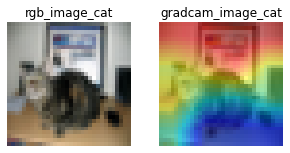

2022-08-01 06:46:58,057 INFO Epoch 1 summary: {'epoch': 1, 'train_loss': tensor(0.9098, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 51.608, 'valid_loss': 0.008050636464357375, 'valid_acc': 0.6386}
2022-08-01 06:46:58,062 INFO 

Epoch: 1, Train Loss: 0.910, Valid Loss: 0.008
2022-08-01 06:46:58,064 INFO Epoch: 1, Train Loss: 0.910, Valid Loss: 0.008
2022-08-01 06:46:58,066 INFO Epoch 2


loss=0.7921856641769409 batch_id=390 Accuracy=71.166: 100%|██████████| 391/391 [00:46<00:00,  8.50it/s]

use gradcam or not  1



Test set: Average loss: 0.0062, Accuracy: 7275/10000 (73%)

2022-08-01 06:47:47,610 INFO 
Test set: Average loss: 0.0062, Accuracy: 7275/10000 (73%)



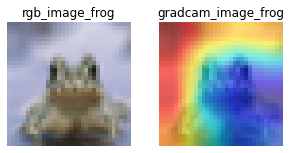

2022-08-01 06:47:48,542 INFO Epoch 2 summary: {'epoch': 2, 'train_loss': tensor(0.7922, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 71.166, 'valid_loss': 0.006167445486783982, 'valid_acc': 0.7275}
2022-08-01 06:47:48,546 INFO 

Epoch: 2, Train Loss: 0.792, Valid Loss: 0.006
2022-08-01 06:47:48,549 INFO Epoch: 2, Train Loss: 0.792, Valid Loss: 0.006
2022-08-01 06:47:48,552 INFO Epoch 3


loss=0.6904491186141968 batch_id=390 Accuracy=78.786: 100%|██████████| 391/391 [00:45<00:00,  8.50it/s]

use gradcam or not  1



Test set: Average loss: 0.0051, Accuracy: 7854/10000 (79%)

2022-08-01 06:48:37,437 INFO 
Test set: Average loss: 0.0051, Accuracy: 7854/10000 (79%)



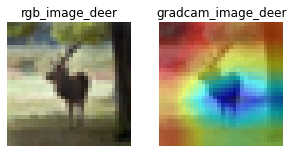

2022-08-01 06:48:38,028 INFO Epoch 3 summary: {'epoch': 3, 'train_loss': tensor(0.6904, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 78.786, 'valid_loss': 0.0050705416113138195, 'valid_acc': 0.7854}
2022-08-01 06:48:38,035 INFO 

Epoch: 3, Train Loss: 0.690, Valid Loss: 0.005
2022-08-01 06:48:38,038 INFO Epoch: 3, Train Loss: 0.690, Valid Loss: 0.005
2022-08-01 06:48:38,040 INFO Epoch 4


loss=0.30451807379722595 batch_id=390 Accuracy=82.928: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s]

use gradcam or not  1



Test set: Average loss: 0.0062, Accuracy: 7463/10000 (75%)

2022-08-01 06:49:26,732 INFO 
Test set: Average loss: 0.0062, Accuracy: 7463/10000 (75%)



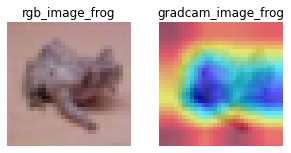

2022-08-01 06:49:27,311 INFO Epoch 4 summary: {'epoch': 4, 'train_loss': tensor(0.3045, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 82.928, 'valid_loss': 0.006215945929288864, 'valid_acc': 0.7463}
2022-08-01 06:49:27,316 INFO 

Epoch: 4, Train Loss: 0.305, Valid Loss: 0.006
2022-08-01 06:49:27,319 INFO Epoch: 4, Train Loss: 0.305, Valid Loss: 0.006
2022-08-01 06:49:27,321 INFO Epoch 5


loss=0.2949954867362976 batch_id=390 Accuracy=86.398: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s]

use gradcam or not  1



Test set: Average loss: 0.0045, Accuracy: 8123/10000 (81%)

2022-08-01 06:50:15,998 INFO 
Test set: Average loss: 0.0045, Accuracy: 8123/10000 (81%)



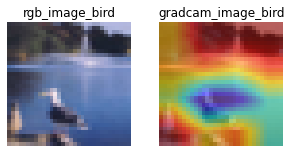

2022-08-01 06:50:16,577 INFO Epoch 5 summary: {'epoch': 5, 'train_loss': tensor(0.2950, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 86.398, 'valid_loss': 0.0044660370260477065, 'valid_acc': 0.8123}
2022-08-01 06:50:16,582 INFO 

Epoch: 5, Train Loss: 0.295, Valid Loss: 0.004
2022-08-01 06:50:16,584 INFO Epoch: 5, Train Loss: 0.295, Valid Loss: 0.004
2022-08-01 06:50:16,586 INFO Epoch 6


loss=0.33491238951683044 batch_id=390 Accuracy=88.92: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]

use gradcam or not  1



Test set: Average loss: 0.0055, Accuracy: 7973/10000 (80%)

2022-08-01 06:51:05,592 INFO 
Test set: Average loss: 0.0055, Accuracy: 7973/10000 (80%)



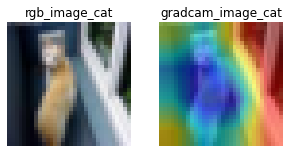

2022-08-01 06:51:06,204 INFO Epoch 6 summary: {'epoch': 6, 'train_loss': tensor(0.3349, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 88.92, 'valid_loss': 0.005451540505886078, 'valid_acc': 0.7973}
2022-08-01 06:51:06,208 INFO 

Epoch: 6, Train Loss: 0.335, Valid Loss: 0.005
2022-08-01 06:51:06,215 INFO Epoch: 6, Train Loss: 0.335, Valid Loss: 0.005
2022-08-01 06:51:06,217 INFO Epoch 7


loss=0.1910947859287262 batch_id=390 Accuracy=91.294: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]

use gradcam or not  1



Test set: Average loss: 0.0054, Accuracy: 8033/10000 (80%)

2022-08-01 06:51:55,312 INFO 
Test set: Average loss: 0.0054, Accuracy: 8033/10000 (80%)



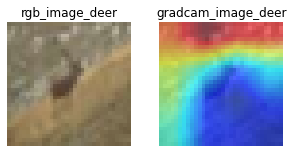

2022-08-01 06:51:55,889 INFO Epoch 7 summary: {'epoch': 7, 'train_loss': tensor(0.1911, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 91.294, 'valid_loss': 0.005353512781858444, 'valid_acc': 0.8033}
2022-08-01 06:51:55,893 INFO 

Epoch: 7, Train Loss: 0.191, Valid Loss: 0.005
2022-08-01 06:51:55,897 INFO Epoch: 7, Train Loss: 0.191, Valid Loss: 0.005
2022-08-01 06:51:55,902 INFO Epoch 8


loss=0.23396870493888855 batch_id=390 Accuracy=92.938: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]

use gradcam or not  1



Test set: Average loss: 0.0052, Accuracy: 8145/10000 (81%)

2022-08-01 06:52:44,915 INFO 
Test set: Average loss: 0.0052, Accuracy: 8145/10000 (81%)



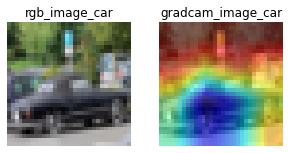

2022-08-01 06:52:45,489 INFO Epoch 8 summary: {'epoch': 8, 'train_loss': tensor(0.2340, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 92.938, 'valid_loss': 0.00522054103910923, 'valid_acc': 0.8145}
2022-08-01 06:52:45,493 INFO 

Epoch: 8, Train Loss: 0.234, Valid Loss: 0.005
2022-08-01 06:52:45,497 INFO Epoch: 8, Train Loss: 0.234, Valid Loss: 0.005
2022-08-01 06:52:45,500 INFO Epoch 9


loss=0.24264338612556458 batch_id=390 Accuracy=94.024: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]

use gradcam or not  1



Test set: Average loss: 0.0048, Accuracy: 8266/10000 (83%)

2022-08-01 06:53:34,641 INFO 
Test set: Average loss: 0.0048, Accuracy: 8266/10000 (83%)



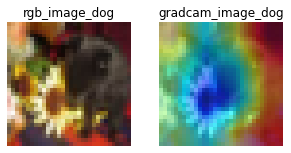

2022-08-01 06:53:35,255 INFO Epoch 9 summary: {'epoch': 9, 'train_loss': tensor(0.2426, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 94.024, 'valid_loss': 0.00478074197024107, 'valid_acc': 0.8266}
2022-08-01 06:53:35,260 INFO 

Epoch: 9, Train Loss: 0.243, Valid Loss: 0.005
2022-08-01 06:53:35,261 INFO Epoch: 9, Train Loss: 0.243, Valid Loss: 0.005
2022-08-01 06:53:35,263 INFO Epoch 10


loss=0.2678718566894531 batch_id=390 Accuracy=95.368: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]

use gradcam or not  1



Test set: Average loss: 0.0052, Accuracy: 8236/10000 (82%)

2022-08-01 06:54:24,278 INFO 
Test set: Average loss: 0.0052, Accuracy: 8236/10000 (82%)



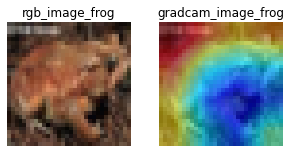

2022-08-01 06:54:24,857 INFO Epoch 10 summary: {'epoch': 10, 'train_loss': tensor(0.2679, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 95.368, 'valid_loss': 0.005229755836725235, 'valid_acc': 0.8236}
2022-08-01 06:54:24,862 INFO 

Epoch: 10, Train Loss: 0.268, Valid Loss: 0.005
2022-08-01 06:54:24,864 INFO Epoch: 10, Train Loss: 0.268, Valid Loss: 0.005
2022-08-01 06:54:24,867 INFO Epoch 11


loss=0.1003846749663353 batch_id=390 Accuracy=95.864: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]

use gradcam or not  1



Test set: Average loss: 0.0058, Accuracy: 8167/10000 (82%)

2022-08-01 06:55:14,136 INFO 
Test set: Average loss: 0.0058, Accuracy: 8167/10000 (82%)



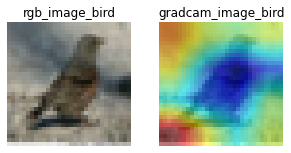

2022-08-01 06:55:14,725 INFO Epoch 11 summary: {'epoch': 11, 'train_loss': tensor(0.1004, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 95.864, 'valid_loss': 0.0058434312880039216, 'valid_acc': 0.8167}
2022-08-01 06:55:14,729 INFO 

Epoch: 11, Train Loss: 0.100, Valid Loss: 0.006
2022-08-01 06:55:14,735 INFO Epoch: 11, Train Loss: 0.100, Valid Loss: 0.006
2022-08-01 06:55:14,737 INFO Epoch 12


loss=0.21347281336784363 batch_id=390 Accuracy=96.71: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]

use gradcam or not  1



Test set: Average loss: 0.0055, Accuracy: 8273/10000 (83%)

2022-08-01 06:56:03,887 INFO 
Test set: Average loss: 0.0055, Accuracy: 8273/10000 (83%)



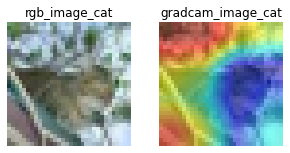

2022-08-01 06:56:04,465 INFO Epoch 12 summary: {'epoch': 12, 'train_loss': tensor(0.2135, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 96.71, 'valid_loss': 0.005511902156472206, 'valid_acc': 0.8273}
2022-08-01 06:56:04,469 INFO 

Epoch: 12, Train Loss: 0.213, Valid Loss: 0.006
2022-08-01 06:56:04,475 INFO Epoch: 12, Train Loss: 0.213, Valid Loss: 0.006
2022-08-01 06:56:04,477 INFO Epoch 13


loss=0.10940651595592499 batch_id=390 Accuracy=96.826: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]

use gradcam or not  1



Test set: Average loss: 0.0058, Accuracy: 8222/10000 (82%)

2022-08-01 06:56:53,728 INFO 
Test set: Average loss: 0.0058, Accuracy: 8222/10000 (82%)



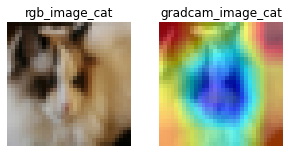

2022-08-01 06:56:54,327 INFO Epoch 13 summary: {'epoch': 13, 'train_loss': tensor(0.1094, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 96.826, 'valid_loss': 0.005759485799074173, 'valid_acc': 0.8222}
2022-08-01 06:56:54,331 INFO 

Epoch: 13, Train Loss: 0.109, Valid Loss: 0.006
2022-08-01 06:56:54,334 INFO Epoch: 13, Train Loss: 0.109, Valid Loss: 0.006
2022-08-01 06:56:54,338 INFO Epoch 14


loss=0.14578087627887726 batch_id=390 Accuracy=97.134: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]

use gradcam or not  1



Test set: Average loss: 0.0055, Accuracy: 8317/10000 (83%)

2022-08-01 06:57:43,687 INFO 
Test set: Average loss: 0.0055, Accuracy: 8317/10000 (83%)



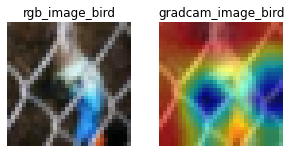

2022-08-01 06:57:44,288 INFO Epoch 14 summary: {'epoch': 14, 'train_loss': tensor(0.1458, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 97.134, 'valid_loss': 0.005519671353697777, 'valid_acc': 0.8317}
2022-08-01 06:57:44,292 INFO 

Epoch: 14, Train Loss: 0.146, Valid Loss: 0.006
2022-08-01 06:57:44,300 INFO Epoch: 14, Train Loss: 0.146, Valid Loss: 0.006
2022-08-01 06:57:44,302 INFO Epoch 15


loss=0.18800194561481476 batch_id=390 Accuracy=97.626: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]

use gradcam or not  1



Test set: Average loss: 0.0056, Accuracy: 8366/10000 (84%)

2022-08-01 06:58:33,557 INFO 
Test set: Average loss: 0.0056, Accuracy: 8366/10000 (84%)



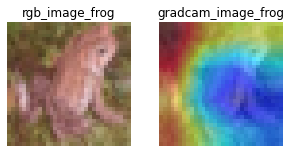

2022-08-01 06:58:34,163 INFO Epoch 15 summary: {'epoch': 15, 'train_loss': tensor(0.1880, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 97.626, 'valid_loss': 0.0055959607422351836, 'valid_acc': 0.8366}
2022-08-01 06:58:34,170 INFO 

Epoch: 15, Train Loss: 0.188, Valid Loss: 0.006
2022-08-01 06:58:34,179 INFO Epoch: 15, Train Loss: 0.188, Valid Loss: 0.006
2022-08-01 06:58:34,185 INFO Epoch 16


loss=0.031705938279628754 batch_id=390 Accuracy=97.734: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]

use gradcam or not  1



Test set: Average loss: 0.0055, Accuracy: 8342/10000 (83%)

2022-08-01 06:59:23,569 INFO 
Test set: Average loss: 0.0055, Accuracy: 8342/10000 (83%)



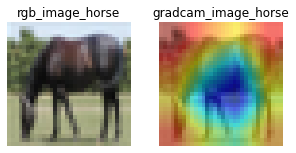

2022-08-01 06:59:24,107 INFO Epoch 16 summary: {'epoch': 16, 'train_loss': tensor(0.0317, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 97.734, 'valid_loss': 0.005486987403035164, 'valid_acc': 0.8342}
2022-08-01 06:59:24,121 INFO 

Epoch: 16, Train Loss: 0.032, Valid Loss: 0.005
2022-08-01 06:59:24,128 INFO Epoch: 16, Train Loss: 0.032, Valid Loss: 0.005
2022-08-01 06:59:24,131 INFO Epoch 17


loss=0.03930240869522095 batch_id=390 Accuracy=98.086: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]

use gradcam or not  1



Test set: Average loss: 0.0054, Accuracy: 8446/10000 (84%)

2022-08-01 07:00:13,357 INFO 
Test set: Average loss: 0.0054, Accuracy: 8446/10000 (84%)



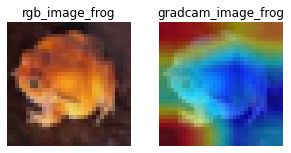

2022-08-01 07:00:13,972 INFO Epoch 17 summary: {'epoch': 17, 'train_loss': tensor(0.0393, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 98.086, 'valid_loss': 0.005354653844237328, 'valid_acc': 0.8446}
2022-08-01 07:00:13,976 INFO 

Epoch: 17, Train Loss: 0.039, Valid Loss: 0.005
2022-08-01 07:00:13,986 INFO Epoch: 17, Train Loss: 0.039, Valid Loss: 0.005
2022-08-01 07:00:13,989 INFO Epoch 18


loss=0.03138818219304085 batch_id=390 Accuracy=98.204: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]

use gradcam or not  1



Test set: Average loss: 0.0058, Accuracy: 8316/10000 (83%)

2022-08-01 07:01:03,375 INFO 
Test set: Average loss: 0.0058, Accuracy: 8316/10000 (83%)



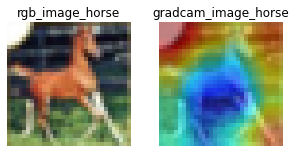

2022-08-01 07:01:03,990 INFO Epoch 18 summary: {'epoch': 18, 'train_loss': tensor(0.0314, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 98.204, 'valid_loss': 0.005820599809288979, 'valid_acc': 0.8316}
2022-08-01 07:01:03,995 INFO 

Epoch: 18, Train Loss: 0.031, Valid Loss: 0.006
2022-08-01 07:01:04,001 INFO Epoch: 18, Train Loss: 0.031, Valid Loss: 0.006
2022-08-01 07:01:04,003 INFO Epoch 19


loss=0.039684806019067764 batch_id=390 Accuracy=98.322: 100%|██████████| 391/391 [00:46<00:00,  8.36it/s]

use gradcam or not  1



Test set: Average loss: 0.0057, Accuracy: 8419/10000 (84%)

2022-08-01 07:01:53,591 INFO 
Test set: Average loss: 0.0057, Accuracy: 8419/10000 (84%)



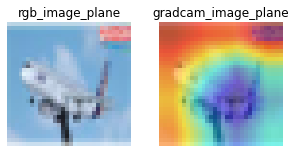

2022-08-01 07:01:54,182 INFO Epoch 19 summary: {'epoch': 19, 'train_loss': tensor(0.0397, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 98.322, 'valid_loss': 0.00565119566321373, 'valid_acc': 0.8419}
2022-08-01 07:01:54,186 INFO 

Epoch: 19, Train Loss: 0.040, Valid Loss: 0.006
2022-08-01 07:01:54,189 INFO Epoch: 19, Train Loss: 0.040, Valid Loss: 0.006
2022-08-01 07:01:54,194 INFO Epoch 20


loss=0.03635010868310928 batch_id=390 Accuracy=98.54: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]

use gradcam or not  1



Test set: Average loss: 0.0050, Accuracy: 8577/10000 (86%)

2022-08-01 07:02:43,556 INFO 
Test set: Average loss: 0.0050, Accuracy: 8577/10000 (86%)



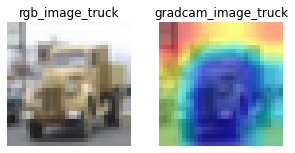

2022-08-01 07:02:44,125 INFO Epoch 20 summary: {'epoch': 20, 'train_loss': tensor(0.0364, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 98.54, 'valid_loss': 0.0050270296663045885, 'valid_acc': 0.8577}
2022-08-01 07:02:44,131 INFO 

Epoch: 20, Train Loss: 0.036, Valid Loss: 0.005
2022-08-01 07:02:44,133 INFO Epoch: 20, Train Loss: 0.036, Valid Loss: 0.005
2022-08-01 07:02:44,134 INFO Epoch 21


loss=0.005357797257602215 batch_id=390 Accuracy=99.328: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]

use gradcam or not  1



Test set: Average loss: 0.0044, Accuracy: 8707/10000 (87%)

2022-08-01 07:03:33,569 INFO 
Test set: Average loss: 0.0044, Accuracy: 8707/10000 (87%)



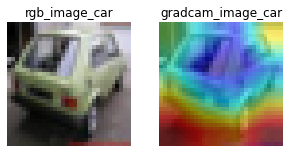

2022-08-01 07:03:34,161 INFO Epoch 21 summary: {'epoch': 21, 'train_loss': tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.328, 'valid_loss': 0.004427929842472076, 'valid_acc': 0.8707}
2022-08-01 07:03:34,167 INFO 

Epoch: 21, Train Loss: 0.005, Valid Loss: 0.004
2022-08-01 07:03:34,170 INFO Epoch: 21, Train Loss: 0.005, Valid Loss: 0.004
2022-08-01 07:03:34,173 INFO Epoch 22


loss=0.007787161972373724 batch_id=390 Accuracy=99.584: 100%|██████████| 391/391 [00:46<00:00,  8.41it/s]

use gradcam or not  1



Test set: Average loss: 0.0044, Accuracy: 8711/10000 (87%)

2022-08-01 07:04:23,516 INFO 
Test set: Average loss: 0.0044, Accuracy: 8711/10000 (87%)



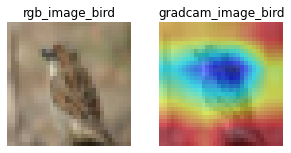

2022-08-01 07:04:24,085 INFO Epoch 22 summary: {'epoch': 22, 'train_loss': tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.584, 'valid_loss': 0.004436337371170521, 'valid_acc': 0.8711}
2022-08-01 07:04:24,089 INFO 

Epoch: 22, Train Loss: 0.008, Valid Loss: 0.004
2022-08-01 07:04:24,097 INFO Epoch: 22, Train Loss: 0.008, Valid Loss: 0.004
2022-08-01 07:04:24,099 INFO Epoch 23


loss=0.012231669388711452 batch_id=390 Accuracy=99.664: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]

use gradcam or not  1



Test set: Average loss: 0.0044, Accuracy: 8717/10000 (87%)

2022-08-01 07:05:13,923 INFO 
Test set: Average loss: 0.0044, Accuracy: 8717/10000 (87%)



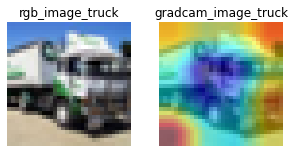

2022-08-01 07:05:14,509 INFO Epoch 23 summary: {'epoch': 23, 'train_loss': tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.664, 'valid_loss': 0.004367348679900169, 'valid_acc': 0.8717}
2022-08-01 07:05:14,513 INFO 

Epoch: 23, Train Loss: 0.012, Valid Loss: 0.004
2022-08-01 07:05:14,517 INFO Epoch: 23, Train Loss: 0.012, Valid Loss: 0.004
2022-08-01 07:05:14,519 INFO Epoch 24


loss=0.006913396529853344 batch_id=390 Accuracy=99.712: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]

use gradcam or not  1



Test set: Average loss: 0.0044, Accuracy: 8737/10000 (87%)

2022-08-01 07:06:04,164 INFO 
Test set: Average loss: 0.0044, Accuracy: 8737/10000 (87%)



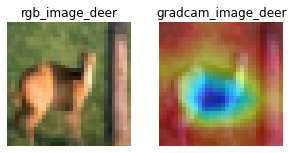

2022-08-01 07:06:04,858 INFO Epoch 24 summary: {'epoch': 24, 'train_loss': tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.712, 'valid_loss': 0.004364022381603718, 'valid_acc': 0.8737}
2022-08-01 07:06:04,862 INFO 

Epoch: 24, Train Loss: 0.007, Valid Loss: 0.004
2022-08-01 07:06:04,869 INFO Epoch: 24, Train Loss: 0.007, Valid Loss: 0.004
2022-08-01 07:06:04,870 INFO Epoch 25


loss=0.0033163116313517094 batch_id=390 Accuracy=99.746: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]

use gradcam or not  1



Test set: Average loss: 0.0045, Accuracy: 8725/10000 (87%)

2022-08-01 07:06:54,377 INFO 
Test set: Average loss: 0.0045, Accuracy: 8725/10000 (87%)



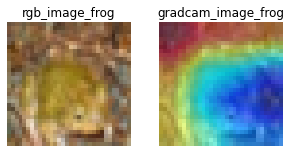

2022-08-01 07:06:54,960 INFO Epoch 25 summary: {'epoch': 25, 'train_loss': tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.746, 'valid_loss': 0.004475038903951645, 'valid_acc': 0.8725}
2022-08-01 07:06:54,966 INFO 

Epoch: 25, Train Loss: 0.003, Valid Loss: 0.004
2022-08-01 07:06:54,968 INFO Epoch: 25, Train Loss: 0.003, Valid Loss: 0.004
2022-08-01 07:06:54,970 INFO Epoch 26


loss=0.0039090001955628395 batch_id=390 Accuracy=99.778: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]

use gradcam or not  1



Test set: Average loss: 0.0044, Accuracy: 8726/10000 (87%)

2022-08-01 07:07:44,387 INFO 
Test set: Average loss: 0.0044, Accuracy: 8726/10000 (87%)



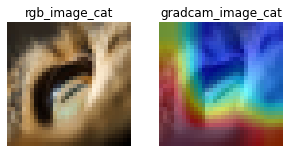

2022-08-01 07:07:44,961 INFO Epoch 26 summary: {'epoch': 26, 'train_loss': tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.778, 'valid_loss': 0.00443267776966095, 'valid_acc': 0.8726}
2022-08-01 07:07:44,971 INFO 

Epoch: 26, Train Loss: 0.004, Valid Loss: 0.004
2022-08-01 07:07:44,973 INFO Epoch: 26, Train Loss: 0.004, Valid Loss: 0.004
2022-08-01 07:07:44,976 INFO Epoch 27


loss=0.015008735470473766 batch_id=390 Accuracy=99.784: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]

use gradcam or not  1



Test set: Average loss: 0.0045, Accuracy: 8732/10000 (87%)

2022-08-01 07:08:34,470 INFO 
Test set: Average loss: 0.0045, Accuracy: 8732/10000 (87%)



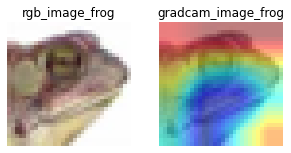

2022-08-01 07:08:35,069 INFO Epoch 27 summary: {'epoch': 27, 'train_loss': tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.784, 'valid_loss': 0.004527590423822403, 'valid_acc': 0.8732}
2022-08-01 07:08:35,073 INFO 

Epoch: 27, Train Loss: 0.015, Valid Loss: 0.005
2022-08-01 07:08:35,076 INFO Epoch: 27, Train Loss: 0.015, Valid Loss: 0.005
2022-08-01 07:08:35,080 INFO Epoch 28


loss=0.006047091446816921 batch_id=390 Accuracy=99.824: 100%|██████████| 391/391 [00:46<00:00,  8.36it/s]

use gradcam or not  1



Test set: Average loss: 0.0044, Accuracy: 8740/10000 (87%)

2022-08-01 07:09:24,750 INFO 
Test set: Average loss: 0.0044, Accuracy: 8740/10000 (87%)



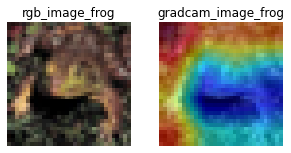

2022-08-01 07:09:25,363 INFO Epoch 28 summary: {'epoch': 28, 'train_loss': tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.824, 'valid_loss': 0.004396240742504597, 'valid_acc': 0.874}
2022-08-01 07:09:25,368 INFO 

Epoch: 28, Train Loss: 0.006, Valid Loss: 0.004
2022-08-01 07:09:25,375 INFO Epoch: 28, Train Loss: 0.006, Valid Loss: 0.004
2022-08-01 07:09:25,378 INFO Epoch 29


loss=0.00774108711630106 batch_id=390 Accuracy=99.832: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]

use gradcam or not  1



Test set: Average loss: 0.0044, Accuracy: 8743/10000 (87%)

2022-08-01 07:10:14,857 INFO 
Test set: Average loss: 0.0044, Accuracy: 8743/10000 (87%)



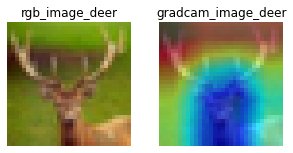

2022-08-01 07:10:15,447 INFO Epoch 29 summary: {'epoch': 29, 'train_loss': tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.832, 'valid_loss': 0.004428709341585636, 'valid_acc': 0.8743}
2022-08-01 07:10:15,454 INFO 

Epoch: 29, Train Loss: 0.008, Valid Loss: 0.004
2022-08-01 07:10:15,456 INFO Epoch: 29, Train Loss: 0.008, Valid Loss: 0.004
2022-08-01 07:10:15,458 INFO Epoch 30


loss=0.0062561919912695885 batch_id=390 Accuracy=99.806: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]

use gradcam or not  1



Test set: Average loss: 0.0044, Accuracy: 8755/10000 (88%)

2022-08-01 07:11:04,719 INFO 
Test set: Average loss: 0.0044, Accuracy: 8755/10000 (88%)



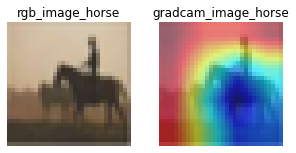

2022-08-01 07:11:05,313 INFO Epoch 30 summary: {'epoch': 30, 'train_loss': tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.806, 'valid_loss': 0.00439275013897568, 'valid_acc': 0.8755}
2022-08-01 07:11:05,319 INFO 

Epoch: 30, Train Loss: 0.006, Valid Loss: 0.004
2022-08-01 07:11:05,323 INFO Epoch: 30, Train Loss: 0.006, Valid Loss: 0.004
2022-08-01 07:11:05,326 INFO Epoch 31


loss=0.0018447472248226404 batch_id=390 Accuracy=99.788: 100%|██████████| 391/391 [00:46<00:00,  8.35it/s]

use gradcam or not  1



Test set: Average loss: 0.0045, Accuracy: 8726/10000 (87%)

2022-08-01 07:11:54,953 INFO 
Test set: Average loss: 0.0045, Accuracy: 8726/10000 (87%)



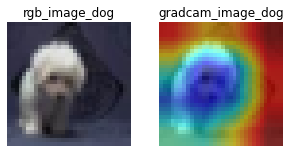

2022-08-01 07:11:55,560 INFO Epoch 31 summary: {'epoch': 31, 'train_loss': tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.788, 'valid_loss': 0.004475301149487495, 'valid_acc': 0.8726}
2022-08-01 07:11:55,566 INFO 

Epoch: 31, Train Loss: 0.002, Valid Loss: 0.004
2022-08-01 07:11:55,574 INFO Epoch: 31, Train Loss: 0.002, Valid Loss: 0.004
2022-08-01 07:11:55,580 INFO Epoch 32


loss=0.008245972916483879 batch_id=390 Accuracy=99.812: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]

use gradcam or not  1



Test set: Average loss: 0.0045, Accuracy: 8724/10000 (87%)

2022-08-01 07:12:44,854 INFO 
Test set: Average loss: 0.0045, Accuracy: 8724/10000 (87%)



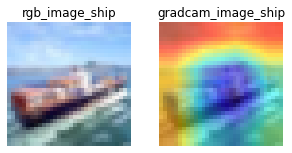

2022-08-01 07:12:45,471 INFO Epoch 32 summary: {'epoch': 32, 'train_loss': tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.812, 'valid_loss': 0.004522251982986927, 'valid_acc': 0.8724}
2022-08-01 07:12:45,475 INFO 

Epoch: 32, Train Loss: 0.008, Valid Loss: 0.005
2022-08-01 07:12:45,479 INFO Epoch: 32, Train Loss: 0.008, Valid Loss: 0.005
2022-08-01 07:12:45,482 INFO Epoch 33


loss=0.003972494043409824 batch_id=390 Accuracy=99.852: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]

use gradcam or not  1



Test set: Average loss: 0.0045, Accuracy: 8725/10000 (87%)

2022-08-01 07:13:34,872 INFO 
Test set: Average loss: 0.0045, Accuracy: 8725/10000 (87%)



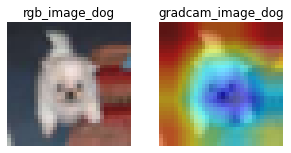

2022-08-01 07:13:35,480 INFO Epoch 33 summary: {'epoch': 33, 'train_loss': tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>), 'train_acc': 99.852, 'valid_loss': 0.004450315475463867, 'valid_acc': 0.8725}
2022-08-01 07:13:35,487 INFO 

Epoch: 33, Train Loss: 0.004, Valid Loss: 0.004
2022-08-01 07:13:35,495 INFO Epoch: 33, Train Loss: 0.004, Valid Loss: 0.004
2022-08-01 07:13:35,499 INFO Epoch 34


loss=0.0015412246575579047 batch_id=226 Accuracy=99.86233480176212:  58%|█████▊    | 227/391 [00:27<00:19,  8.38it/s]


KeyboardInterrupt: ignored

In [13]:
trainer.train(train_data_loader, valid_data_loader, epochs['n_epochs'],classes, use_gradcam)


Debugging

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision


# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     img = np.transpose(npimg, (1, 2, 0))
#     plt.imshow(img)
#     plt.show()


# get some random training images
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

print (images.shape)
# show images
# imshow(torchvision.utils.make_grid(images[0]))
img = torchvision.utils.make_grid(images[0])
img = img / 2 + 0.5     # unnormalize
npimg = img.numpy()
target_img = np.transpose(npimg, (1, 2, 0))
plt.imshow(target_img)
plt.show()
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

In [ ]:
classes

In [ ]:
# from google.colab.patches import cv2_imshow
# plt.imshow(target_img)
from torchvision import models

In [ ]:
model = torch.load('pytorch-output/cifar10/output/model.pth')
# model = models.resnet50(pretrained=True)

In [ ]:
import cv2
import numpy as np
import torch
from torchvision.transforms import Compose, Normalize, ToTensor
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from pytorch_grad_cam import GuidedBackpropReLUModel

In [ ]:
def preprocess_image(img: np.ndarray, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) -> torch.Tensor:
    preprocessing = Compose([
        ToTensor(),
        Normalize(mean=mean, std=std)
    ])
    return preprocessing(img.copy()).unsqueeze(0)

In [ ]:
target_layers = [model.layer4]

rgb_img = target_img
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])


# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category (for every member in the batch) will be used.
# You can target specific categories by
# targets = [ClassifierOutputTarget(8)]
targets = None

# Using the with statement ensures the context is freed, and you can
# recreate different CAM objects in a loop.
# cam_algorithm = methods[args.method]
with GradCAM(model=model,target_layers=target_layers,use_cuda=1) as cam:

        cam.batch_size = 1
        grayscale_cam = cam(input_tensor=input_tensor,targets=targets)

        # Here grayscale_cam has only one image in the batch
        grayscale_cam = grayscale_cam[0, :]

        cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

        # cam_image is RGB encoded whereas "cv2.imwrite" requires BGR encoding.
        cam_image = cv2.cvtColor(cam_image, cv2.COLOR_RGB2BGR)

In [ ]:
gb_model = GuidedBackpropReLUModel(model=model, use_cuda=1)
gb = gb_model(input_tensor, target_category=None)

cam_mask = cv2.merge([grayscale_cam, grayscale_cam, grayscale_cam])
cam_gb = deprocess_image(cam_mask * gb)
gb = deprocess_image(gb)
# plt.imshow(cam_image)

In [ ]:
plt.imshow(cam_image)


In [ ]:
plt.imshow(gb)


In [ ]:
plt.imshow(cam_gb)